In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

<h2>Task 1</h2>

**(a)**

Let $\, X_1,...,X_n \overset{\perp}{\sim} F \,$ such that $\, \mathbb{E}[X_i] = \mu, \, \, i=1,...,n.$ Let $\, a, b \in \mathbb{R} \,$ such that $\, a < b. \,$ The probability

$$ p = \mathbb{P} \left(a < \frac{1}{n} \sum_{i=1}^{n} X_i - \mu < b \right) = \mathbb{P}(a < \overline{X} - \mu < b) $$

(i.e., the probability that the deviation of the sample mean from the true population mean lies in the interval $\, [a,b]) \,$ can be estimated via bootstrapping.

We start by noting that the population mean is usually unknown, meaning that we have to estimate it from the collected sample

$$ \hat{\mu} =  \overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i. $$

Here is where bootstrapping comes in; to mimic the behaviour of the deviation of interest $\, \overline{X} - \mu, \,$ we instead simulate $\, m \,$ bootstrap samples:

$$ X^j_1,...,X^j_n \overset{\perp}{\sim} F_n, \quad j=1,...,m, $$

where the bootstrap samples are generated by sampling from the original sample with *replacement*. Then, for each of the $\, m \,$ bootstrap samples, we calculate the bootstrap estimator (mean in this case) from the bootstrap samples

$$ \overline{X}^{*j} = \frac{1}{n} \sum_{i=1}^{n} X_i^{*j}, \quad j=1,...,m. $$

Finally, to estimate $\, p, \,$ we calculate the proportion of the deviations that fall in the interval $\, [a,b]: \,$

$$ \hat{p} = \frac{1}{m} \sum_{j=1}^{m} I\left\{a \le \overline{X}^{*j} - \overline{X} \le b \right \}, $$

where $\, I(\cdot) \,$ is an indicator variable evaluating to $\, 1 \,$ if the expression is *true*, and to $\, 0 \,$ if the expression is *false*.

To make it clear what's happening above, we introduce some notation:

- $F$: the true (yet usually unknown) distribution of the data (CDF)
- $F_n$: the empirical distribution of the data (ECDF) based on the sample size $\, n; \,$ ECDF places a weight of $\, \frac{1}{n} \,$ for each observation

So in bootstrapping, we are sampling with replacement from $\, F_n \,$ (since it is the only distribution that we can directly use, as we do not (usually) have access to $\, F). \,$ It turns out that as $\, n \rightarrow \infty, \,$ $\, F_n \rightarrow F. \,$

**(b)**

In [2]:
data = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])

In [10]:
def bs_prob(x, m, a=-5, b=5):
    # Bootstrap
    n = len(x)
    bs_estimates = np.zeros(m)
    for i in range(m):
        bs_sample = np.random.choice(a=x, size=n, replace=True)
        bs_estimates[i] = np.mean(bs_sample)
    
    # Estimate p
    sample_mean = np.mean(x)
    deviations = bs_estimates - sample_mean
    p_hat = np.where((a <= deviations) & (deviations <= b), 1, 0).sum() / m
    print(f'Estimate of p: {p_hat:.5f}')
    
    # Plot the bootstrap distribution of the deviations
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(deviations, bins=30, edgecolor='black')
    ax.set_title('The bootstrap distribution of the deviations')

Estimate of p: 0.77029


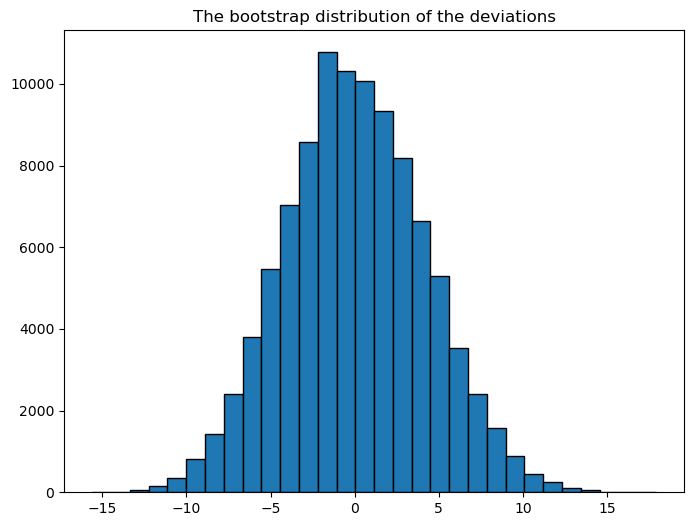

In [11]:
bs_prob(x=data, m=100000)

<h2>Task 2</h2>

Since we are not given any information on from which distribution the values are coming from, we're going to assume that the data are normally distributed, which is a reasonable assumption in simulation studies due to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). Then, we can proceed to say that the number of draws $\, n \,$ needed is such that

$$ \frac{2.58 S_n}{\sqrt{n}} \approx 0.5, $$

where $\, S_n \,$ is the sample standard deviation based on the first 20 data values. Where 2.58 comes from the confidence level $\, \alpha = 0.01 \,$

$$ \mathbb{P}(-z_{\alpha / 2} \le Z \le z_{\alpha / 2}) = 0.99. $$  

In [2]:
a = 0.01
zl = stats.norm.ppf(a/2)
zu = stats.norm.ppf(1 - a/2)
stats.norm.cdf(zu) - stats.norm.cdf(zl)

np.float64(0.99)

\begin{align*}
    \frac{2.58 S_n}{\sqrt{n}} &\approx 0.5 \\
    2.58 S_n &\approx 0.5 \sqrt{n} \\
    \frac{2.58 S_n}{0.5} &\approx \sqrt{n} \\
    n &\approx \frac{2.58^2 S_n^2}{0.5^2}
\end{align*}

In [2]:
data = np.array([102,112,131,107,114,95,133,145,139,117,93,111,124,122,136,141,119,122,151,143])

In [7]:
np.ceil(((2.58**2 * np.std(data, ddof=1)**2) / 0.5**2) - len(data))

np.float64(7495.0)

- Assuming that the data $\, X_1,...X_n \,$ are i.d.d. coming from a normal distribution, we would need approximately 7495 additional values.

We finally note that many textbooks use $\, z_{0.995} = 2.58, \,$ when in reality 

In [12]:
stats.norm.ppf(0.995)

np.float64(2.5758293035489004)

So if we used this more precise value, the required sample size would be slightly different.

In [7]:
def bs_CI_percentile_method(x, m, n=7495+20):
    bs_estimates = np.zeros(m)
    for i in range(m):
        bs_sample = np.random.choice(a=x, size=n, replace=True)
        bs_estimates[i] = np.mean(bs_sample)
    lower_bound, upper_bound = np.percentile(a=bs_estimates, q=[2.5, 97.5])
    print(f'The bootstrap estimator: {np.mean(bs_estimates):.3f}')
    print(f'95% confidence interval for the mean: [{lower_bound:.3f}, {upper_bound:.3f}]')
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(bs_estimates, edgecolor='black', bins=30)

The bootstrap estimator: 122.849
95% confidence interval for the mean: [122.478, 123.218]


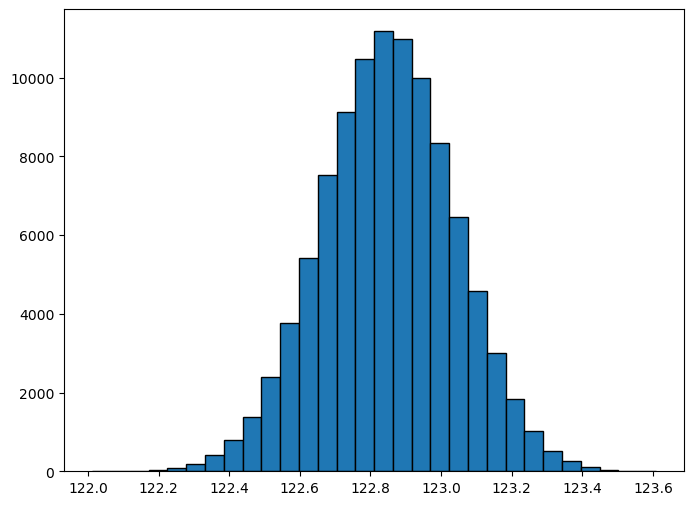

In [8]:
bs_CI_percentile_method(x=data, m=100000)

- Seems legit.

<h2>Task 3</h2>

The sample mean $\, \overline{X} \,$ can be used to estimate the population mean $\, \mu. \,$ It turns out that $\, \overline{X} \,$ is a reasonable estimator of $\, \mu \,$ when $\, \large\frac{\sigma}{\sqrt{n}} \,$ is small. Hence, we generate values until 

$$ \frac{\sigma}{\sqrt{n}} < d, $$

where $\, d \,$ is specified by the researcher as an acceptable standard deviation. Note, however, that one rarely knows the population standard devation $\, \sigma, \,$ so we use the sample standard deviation $\, S \,$ instead. Hence, what we're really monitoring is

$$ \frac{S}{\sqrt{k}} < d, $$

where $\, k \,$ now is the number of generated values. From here we see that 

\begin{align*}
    \frac{S}{\sqrt{k}} &< d \\
    S &< d \sqrt{k} \\
    \frac{S}{d} &< \sqrt{k} \\
    k &> \frac{S^2}{d^2}
\end{align*}

In [2]:
data = np.array([10, 11, 10.5, 11.5, 14, 8, 13, 6, 15, 10, 11.5, 10.5, 12, 8, 16, 5])
S = np.std(data, ddof=1)
d = 0.1

In [4]:
S**2 / d**2

np.float64(906.6666666666665)

- Since we are interested in how many *additional* draws we need, we should subtract the amount that we already have (16).

In [6]:
np.ceil(S**2 / d**2) - 16

np.float64(891.0)

- So we would need additional 891 random draws if we wanted that the standard deviation of the estimator $\, \overline{X} \,$ of $\, \mu \,$ would be less than 0.1.

We can even try to simulate this via bootstrapping. What we are interested in statistical terminology is the standard error of the mean:

\begin{align*}
    \text{SD}(\overline{X}) &= \sqrt{\text{Var}(\overline{X})} \\
    &= \sqrt{\text{Var} \left(\frac{1}{n} \sum_{i=1}^{n} X_i \right)} \\
    &= \sqrt{\frac{1}{n^2} \sum_{i=1}^{n} \text{Var}(X_i)} \\
    &= \sqrt{\frac{1}{n^2} n \sigma^2} \\
    &= \sqrt{\frac{\sigma^2}{n}} \\
    &= \frac{\sigma}{\sqrt{n}} \\
    &= \text{SE}(\overline{X}),
\end{align*}

which represents how much we expect the estimator $\, \overline{X} \,$ to vary under repeated sampling.

Note that the derivation above assumes that $\, X_1,...X_n \overset{\perp}{\sim} F \,$ and that $\, \text{Var}(X_i) = \sigma^2, \, i = 1,...,n. \,$ Note also that as previously mentioned, we rarely have access to the population standard deviation $\, \sigma, \,$ so we use the sample standard deviation $\, S \,$ instead. Hence, we estimate the standard error of the sample mean as

$$ \widehat{\text{SE}}(\overline{X}) = \frac{S}{\sqrt{n}}. $$

In [9]:
def bs_SE(x, m, n=907):
    bs_estimates = np.zeros(m)
    for i in range(m):
        bs_sample = np.random.choice(a=x, size=n, replace=True)
        bs_estimates[i] = np.std(bs_sample, ddof=1) / np.sqrt(n)
    return np.mean(bs_estimates)

In [18]:
bs_SE(x=data, m=10)

np.float64(0.09641257149371998)

In [19]:
bs_SE(x=data, m=100)

np.float64(0.0964217416602354)

In [20]:
bs_SE(x=data, m=1000)

np.float64(0.09678790980527452)

In [21]:
bs_SE(x=data, m=10000)

np.float64(0.09676070491928547)

- The standard error of the mean seems to be close to 0.1, but still under it, just like we wanted.


<h2>Task 4</h2>

In [2]:
data = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])

In [8]:
def bs_var(x, m, plot_bs_distr=False):
    # Number of samples in the original data 
    # (we want every bootstrap sample to be the same size as the original data)
    n = len(x)
    
    # An array to store the bootstrap estimates
    bs_estimates = np.zeros(m)
    
    # Generate m bootstrap estimates
    # Each iteration in the loop generates a bootstrap sample,
    # and based on that bootstrap sample, we calculate a bootstrap estimate
    for i in range(m):
        # Sample with replacement from the original data
        bs_sample = np.random.choice(a=x, size=len(x), replace=True)
        
        # Store the ith bootstrap sample
        bs_estimates[i] = np.var(bs_sample, ddof=1)    # Sample variance (n-1 in the denominator)
    
    if plot_bs_distr:
        # Plot the bootstrap distribution of the sample variance
        fig, ax = plt.subplots(figsize=(8,6))
        ax.hist(bs_estimates, bins=30, edgecolor='black')
        ax.set_title(f'Bs distr of the sample variance (m = {m}, Var(S^2) = {np.var(bs_estimates, ddof=1):.2f})')
    
    # Bootstrap estimate of Var(S^2) is the sample variance of the bootstrap estimates
    return np.var(bs_estimates, ddof=1)

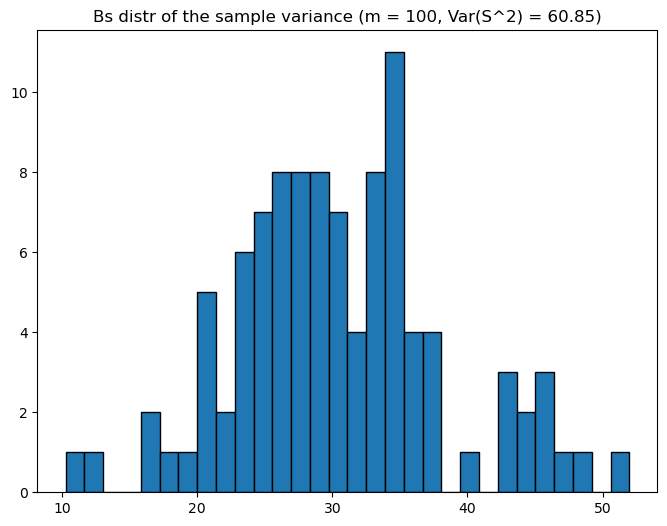

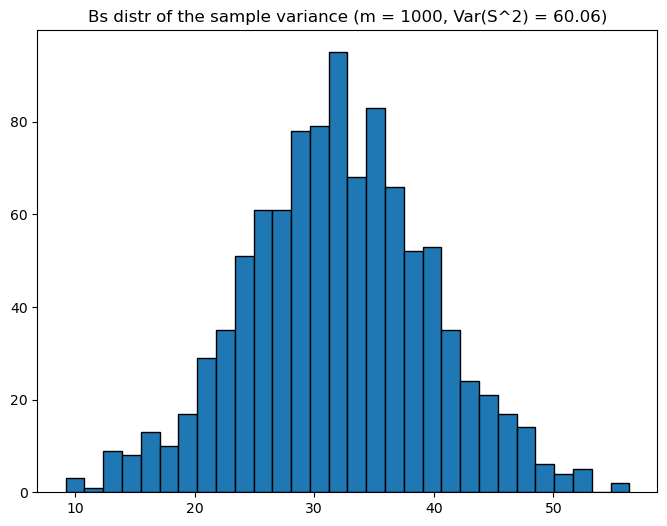

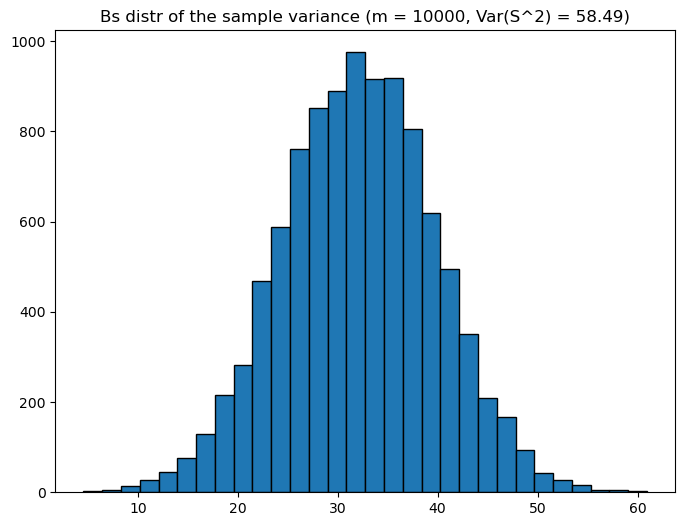

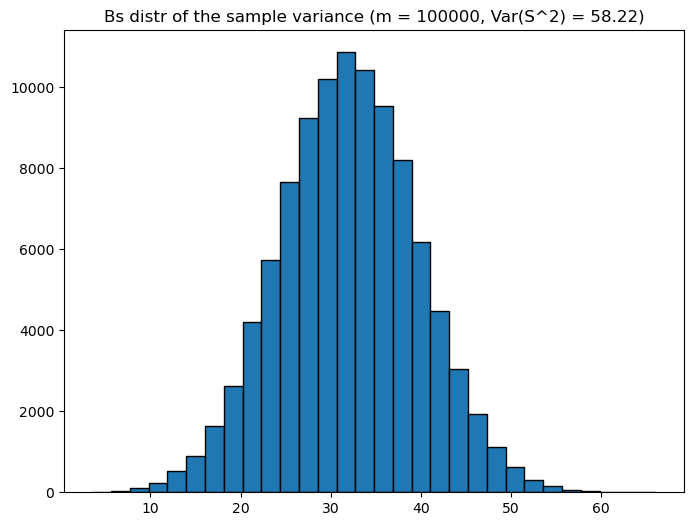

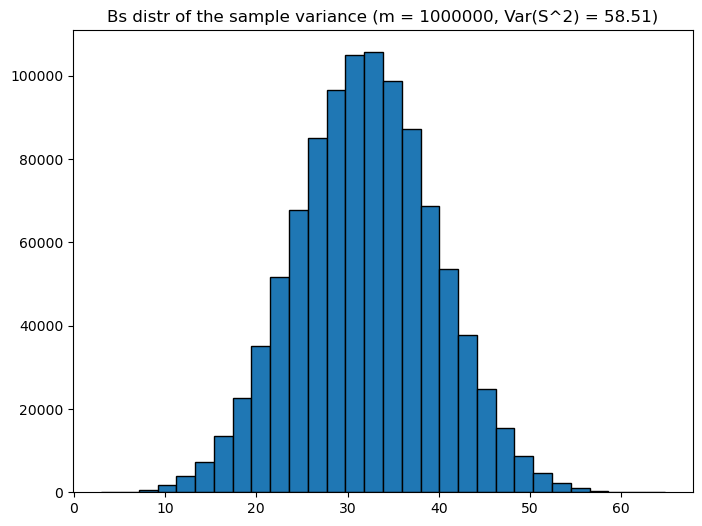

In [9]:
for num_bs_est in [100, 1000, 10000, 100000, 1000000]:
    bs_var(x=data, m=num_bs_est, plot_bs_distr=True)

- It seems that with large $\, n, \,$ the bootstrap estimate of $\, \text{Var}(S^2) \,$ converges to somewhere around $\, 58.5. \,$

In [10]:
# Plot the Monte Carlo sampling distribution of the bootstrap estimate of Var(S^2)
MC_samples = np.array([bs_var(x=data, m=1000) for _ in range(10000)])

- Each iteration in the list comprehension generates one estimate of $\, \text{Var}(S^2) \,$ using $\, 1000 \,$ bootstrap samples.
- In total, we generate 10000 such estimates, effectively forming a Monte Carlo sampling distribution of the bootsrap estimate of $\, \text{Var}(S^2). \,$

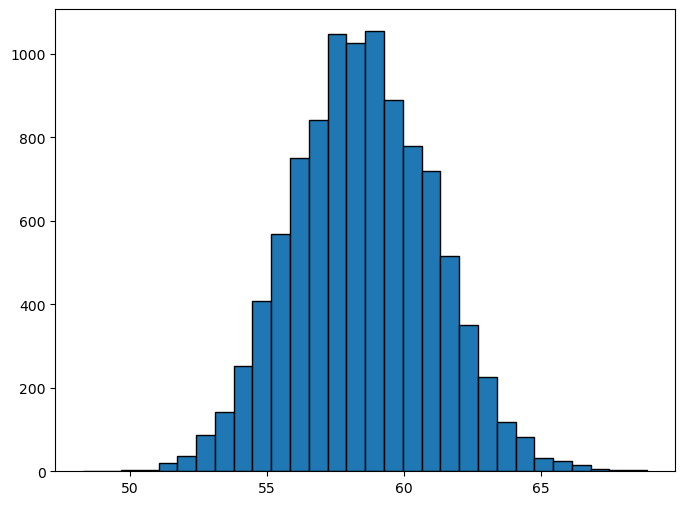

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(MC_samples, bins=30, edgecolor='black');

In [12]:
np.mean(MC_samples)

np.float64(58.50560425343404)

- Notice how this is basically identical to what we obtained above with $\, m=1000000. \,$

<h2>Task 5</h2>

It can be shown that if we add random numbers until their sum exceeds 1, then the expected number of added random numbers is equal to $\, e. \,$ that is, if

$$ N = \text{min} \left \{n: \sum_{i=1}^{n} U_i > 1 \right \}, $$

then $\, \mathbb{E}[N] = e. \,$ 

Let us estimate $\, e \,$ and its variance and 95% confidence interval using 1000 simulation runs.

In [4]:
def bs_e(n=1000):
    bs_estimates = np.zeros(n)
    for i in range(n):
        N = 0
        s = 0
        while s <= 1:
            s += np.random.uniform()
            N += 1
        bs_estimates[i] = N
    
    # E[N]
    e = np.mean(bs_estimates)
    
    # Variance
    var_e = np.var(bs_estimates, ddof=1)
    
    # 95% confidence interval using normal approximation
    lower_bound = e - 1.96 * (np.std(bs_estimates, ddof=1) / np.sqrt(n))
    upper_bound = e + 1.96 * (np.std(bs_estimates, ddof=1) / np.sqrt(n))
    
    print(f'E[N] = {e:.4f}')
    print(f'Var(E[N]) = {var_e:.4f}')
    print(f'95% CI (normal approximation): [{lower_bound:.5f}, {upper_bound:.5f}]')  

In [5]:
bs_e()

E[N] = 2.7150
Var(E[N]) = 0.7725
95% CI (normal approximation): [2.66052, 2.76948]
